# Practical 5 - SVM Classification

By 23AIML056_Kavya

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *

from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("datasets/default_of_credit_card_clients.csv", header = 1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.shape

(30000, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

## Statistical insights

In [5]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


we will delete ID Column

In [6]:
df = df.drop("ID", axis=1)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Visualisation

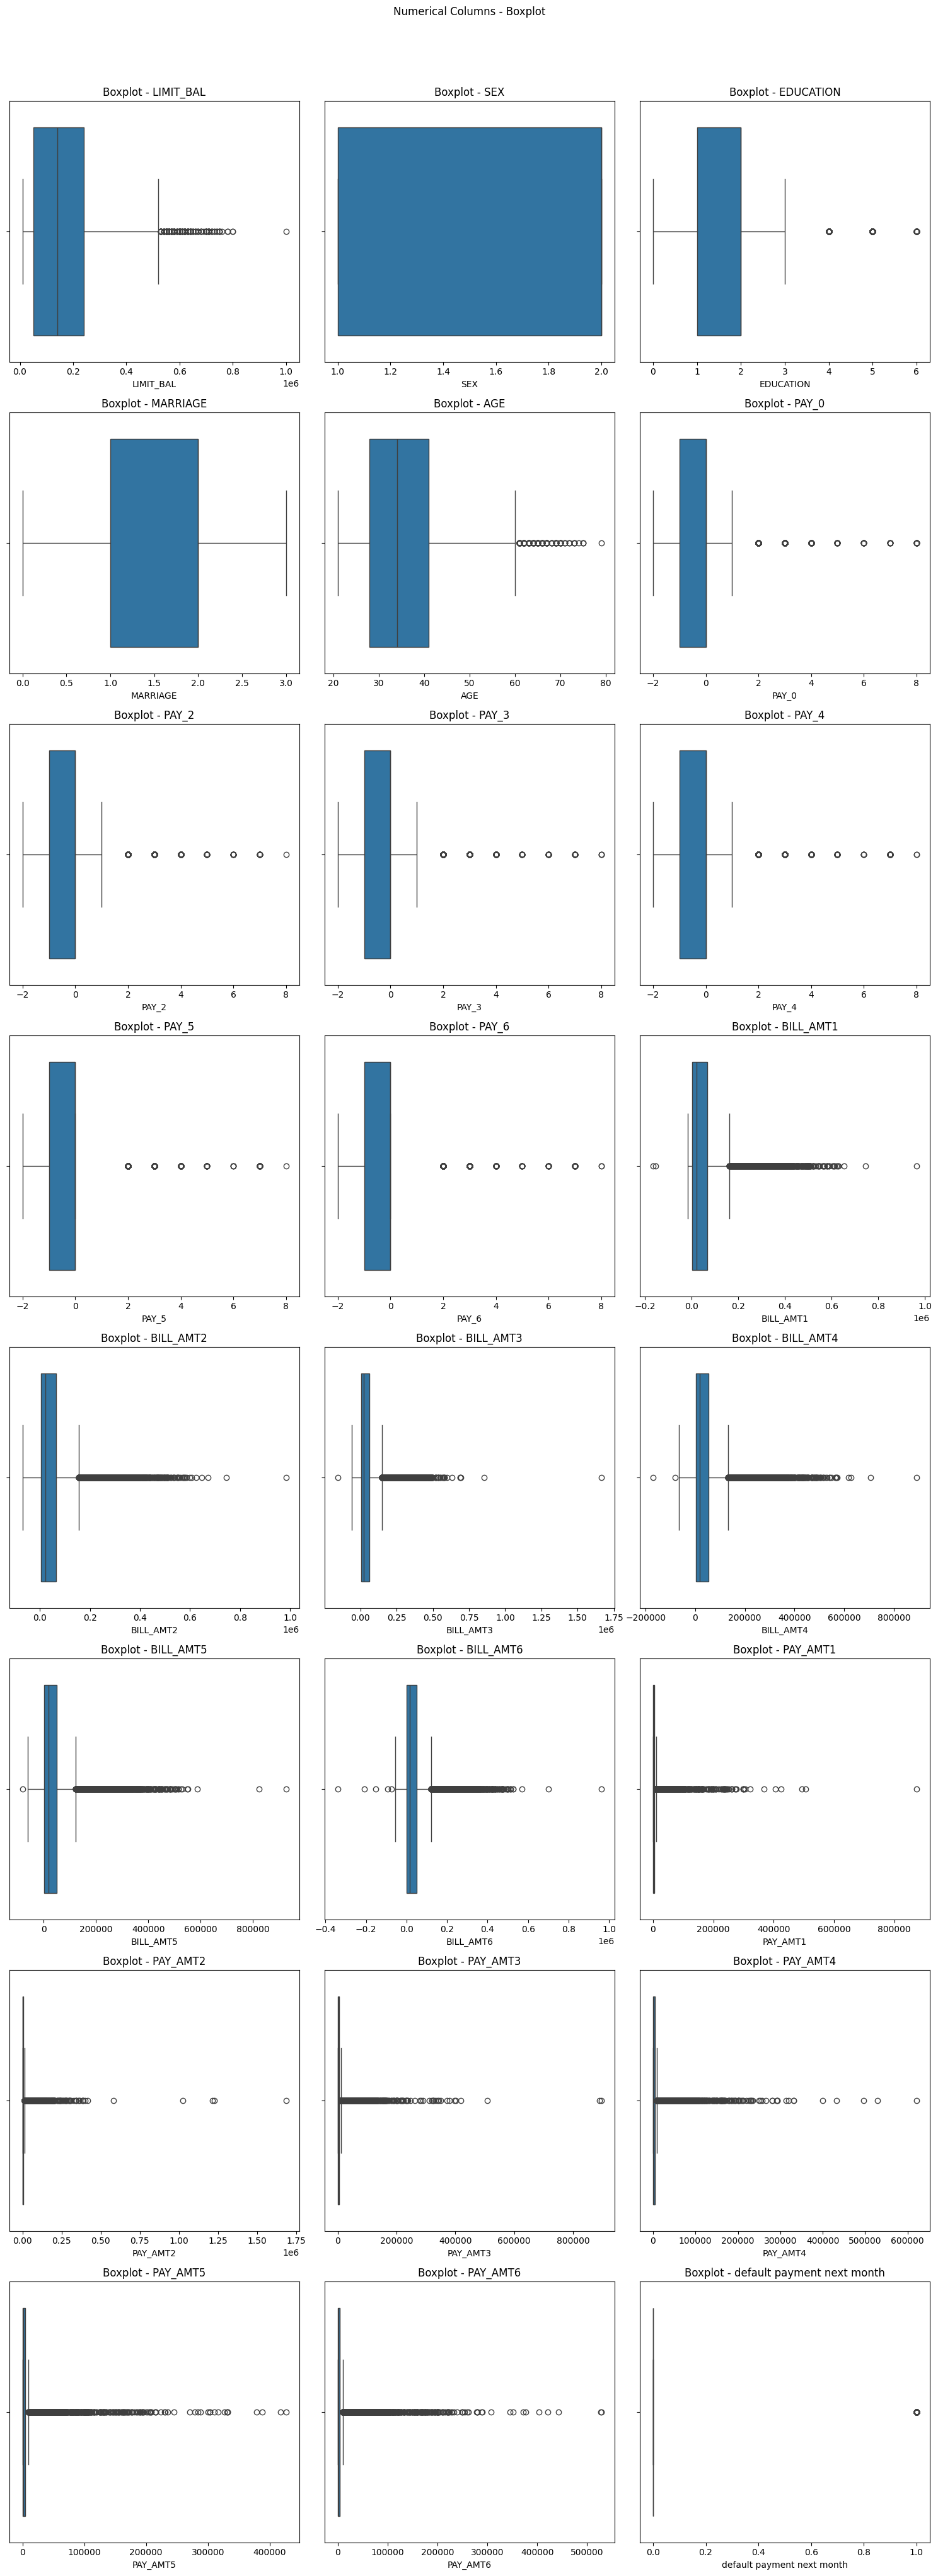

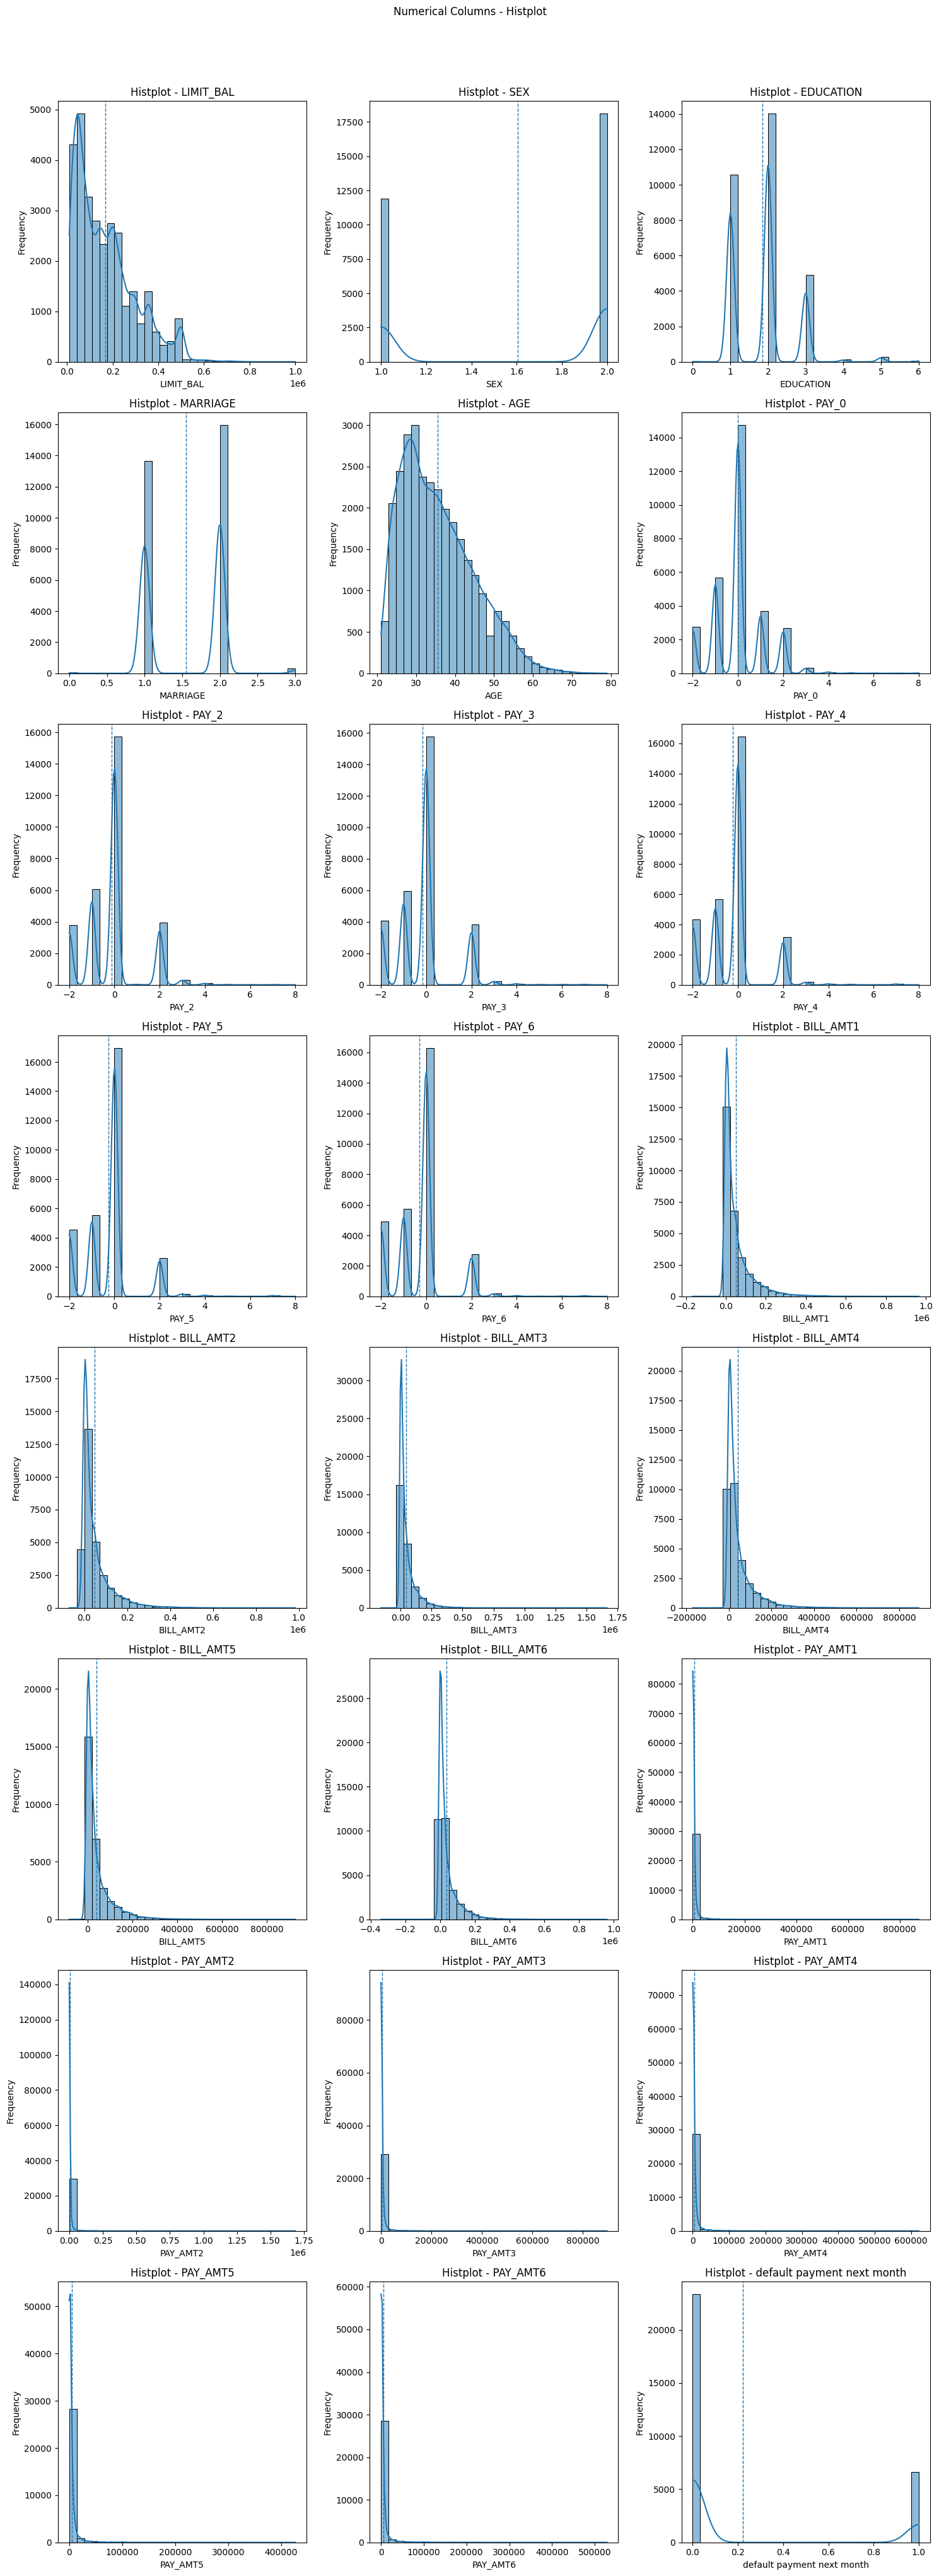

In [7]:
def plot_df(df: pd.DataFrame):
    num_cols = df.select_dtypes(include=["int64", "float64"]).columns
    cat_cols = df.select_dtypes(include=["object"]).columns

    # ---------- CATEGORICAL ----------
    if len(cat_cols) > 0:
        n_cols = 3
        n_rows = math.ceil(len(cat_cols) / n_cols)

        plt.figure(figsize=(n_cols * 5, n_rows * 5))

        for i, col in enumerate(cat_cols, 1):
            plt.subplot(n_rows, n_cols, i)

            values = df[col].value_counts()
            top = values.head(5)

            if len(values) > 5:
                top["Others"] = values[5:].sum()

            plt.pie(top, labels=top.index, autopct="%1.1f%%", startangle=90)
            plt.title(f"Pie Chart - {col}")

        plt.suptitle("Categorical Columns - Pie Chart", y=1.02)
        plt.tight_layout()
        plt.show()

    # ---------- NUMERICAL BOXPLOTS ----------
    if len(num_cols) > 0:
        n_cols = 3
        n_rows = math.ceil(len(num_cols) / n_cols)

        plt.figure(figsize=(n_cols * 5, n_rows * 5))

        for i, col in enumerate(num_cols, 1):
            plt.subplot(n_rows, n_cols, i)
            sns.boxplot(x=df[col])
            plt.title(f"Boxplot - {col}")

        plt.suptitle("Numerical Columns - Boxplot", y=1.02)
        plt.tight_layout()
        plt.show()

        # ---------- HISTOGRAMS ----------
        plt.figure(figsize=(n_cols * 5, n_rows * 5))

        for i, col in enumerate(num_cols, 1):
            plt.subplot(n_rows, n_cols, i)
            sns.histplot(df[col].dropna(), kde=True, bins=30)
            plt.axvline(df[col].mean(), linestyle="dashed", linewidth=1)
            plt.title(f"Histplot - {col}")
            plt.xlabel(col)
            plt.ylabel("Frequency")

        plt.suptitle("Numerical Columns - Histplot", y=1.02)
        plt.tight_layout()
        plt.show()

plot_df(df)

### Conclusion

- Our histogram indicate that our data is not uniformally distrbiture
- Our boxplot indicate that out data has a lot of outliers.

## Target Feature Analysis - default payment next month

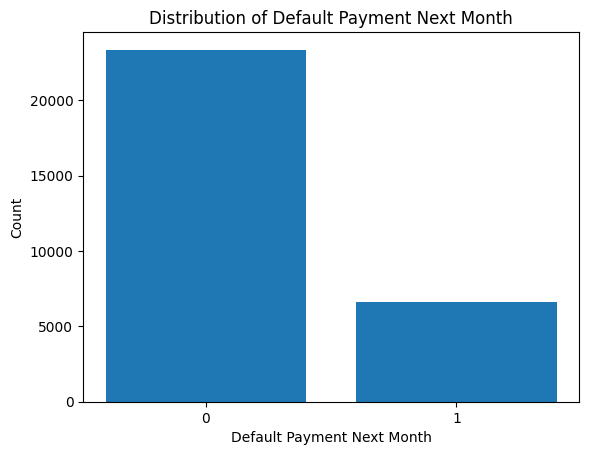

In [8]:
target_feature = "default payment next month"

df[target_feature] = df[target_feature].astype(str)

target_counts = df[target_feature].value_counts()

# Create bar plot
plt.figure()
plt.bar(target_counts.index, target_counts.values)
plt.xlabel("Default Payment Next Month")
plt.ylabel("Count")
plt.title("Distribution of Default Payment Next Month")
plt.show()

Our dataset is heavily imbalanced so we will have to stratify

## Feature Selection

In [9]:
X = df.drop('default payment next month', axis=1)
y = df['default payment next month']

## Data Split and preparation

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [11]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## Testing different model

In [12]:
l_svc = LinearSVC(random_state=42, max_iter=10000)
l_svc.fit(X_train_sc, y_train)
y_pred_lsvc = l_svc.predict(X_test_sc)

In [13]:
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_sc, y_train)
y_pred_lr = lr.predict(X_test_sc)

In [14]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_sc, y_train)
y_pred_rf = rf.predict(X_test_sc)

In [15]:
results = {
    'Algorithm': ['SVC (Linear)', 'Logistic Regression', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lsvc),
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf)
    ],
    'F1-Score (Macro)': [
        f1_score(y_test, y_pred_lsvc, average='macro'),
        f1_score(y_test, y_pred_lr, average='macro'),
        f1_score(y_test, y_pred_rf, average='macro')
    ]
}

comparison_df = pd.DataFrame(results)
display(comparison_df)

,Algorithm,Accuracy,F1-Score (Macro)
0,SVC (Linear),0.804333,0.58920
1,Logistic Regression,0.807667,0.62114
2,Random Forest,0.811667,0.67141


## Hyper paramter tuning

In [16]:
X_train_small, _, y_train_small, _ = train_test_split(X_train_sc, y_train, train_size=2000, random_state=42, stratify=y_train)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}

In [17]:
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, refit=True, verbose=1, cv=3)
grid.fit(X_train_small, y_train_small)

grid.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


{'C': 10, 'gamma': 0.01}

In [18]:
y_pred_tuned = grid.predict(X_test_sc)

In [19]:
tuned_acc = accuracy_score(y_test, y_pred_tuned)
tuned_f1 = f1_score(y_test, y_pred_tuned, average='macro')

print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4673
           1       0.66      0.32      0.43      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.64      0.66      6000
weighted avg       0.79      0.81      0.79      6000



## Plotting final results

In [20]:
tuned_res = {
    'Algorithm': 'SVC (Tuned RBF)', 
    'Accuracy': accuracy_score(y_test, y_pred_tuned),
    'F1-Score (Macro)': f1_score(y_test, y_pred_tuned, average='macro')
}

tuned_res_df = pd.DataFrame([tuned_res])
comparison_df = pd.concat([comparison_df, tuned_res_df], ignore_index=True)

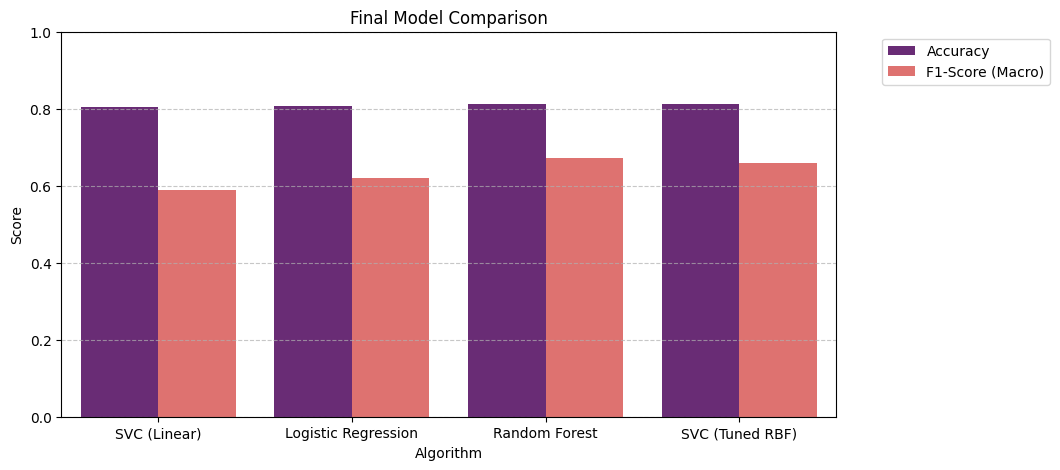

In [21]:
plt.figure(figsize=(10, 5))
melted_df = comparison_df.melt(id_vars='Algorithm', var_name='Metric', value_name='Score')

sns.barplot(data=melted_df, x='Algorithm', y='Score', hue='Metric', palette='magma')
plt.title('Final Model Comparison')
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Conclusion

- Tuned RBF SVC and Random Forest are performing the same but the others aren't really far away in performance so we can use other models for lower inference cost